# U.S. Medical Insurance Costs

In this project, a **CSV** file with medical insurance costs will be investigated using Python fundamentals. The goal with this project will be to analyze various attributes within **insurance.csv** to learn more about the patient information in the file and gain insight into potential use cases for the dataset.

### 1) Import libraries

To start, all necessary libraries must be imported.

In [1]:
# import libraries
import csv
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

The next step is to look through **insurance.csv** in order to get aquanted with the data. The following aspects of the data file will be checked in order to plan out how to import the data into a Python file:
* The names of columns and rows
* Any noticeable missing data
* Types of values (numerical vs. categorical)

### 2) Load data & EDA

In [2]:
# set var 'pwd' to current working directory so that this code can be used even when this notebook has been moved
pwd = os.getcwd()

In [3]:
# read file and transform into pandas DataFrame
data = pd.read_csv(pwd + '\\insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**insurance.csv** contains the following columns:
* Patient Age
* Patient Sex 
* Patient BMI
* Patient Number of Children
* Patient Smoking Status
* Patient U.S Geopraphical Region
* Patient Yearly Medical Insurance Cost

### 3) Data optimisation

Purpose:
- Reduce size of numeric features where possible to save memory usage. This is especially important with larger datasets. This dataset is small, but will serve as a base case for Data Optimisation methods for future use on larger datasets.

Methods:
1) Reducing numeric dtypes

#### 3.1 Data Optimisation - Reducing numeric dtypes

In [4]:
# Reduce memory usage
def reduce_mem_usage(df, verbose=True):
    """
    Function to reduce memory usage by looping through each column, determining its dtype
    if column is numeric, calculate memory usage and reassign smaller numeric dtype if possible
    else leave column as is
    
    :param: df = DataFrame to be reduced
    :param: verbose = True, by default
    """
    
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    
    print(df.info())
    print("-"*30)
    
    start_mem = df.memory_usage(deep=True).sum() / 1024**2
    print(f'Starting memory: {round(start_mem,2)} Mb')
    print("-"*30)
    
    # loop through DataFrame columns
    for col in df.columns:
        # find each column dtype
        col_type = df[col].dtypes
        # if column is numeric
        if col_type in numerics:
            c_min = np.min(df[col]) # find smallest numeric value in column
            c_max = np.max(df[col]) # find largest numeric value in column
            #if column is 'int' type
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
                # if column is 'float' type
                else:
                    if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                        df[col] = df[col].astype(np.float16)
                    elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                        df[col] = df[col].astype(np.float32)
                    else:
                        df[col] = df[col].astype(np.float64)
        # if column is non-numeric
        else:
            continue
    
    end_mem = df.memory_usage(deep=True).sum() / 1024**2
    
    if verbose: print(f'Mem. usage decreased to {round(end_mem,2)} Mb ({round(100 * (start_mem - end_mem) / start_mem,2)}% reduction)')
    print("-"*30)
    print(df.info())
    
    return df

In [5]:
df = data.copy()
df = reduce_mem_usage(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
------------------------------
Starting memory: 0.28 Mb
------------------------------
Mem. usage decreased to 0.26 Mb (6.38% reduction)
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int8   
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   c

### 4) Data Cleaning

Check for:
1) Null values
2) Zero values
3) Outliers

#### 4.1 Data Cleaning - Check for Null values 

In [6]:
# Check for null values
df.info()

# Alternative below
# df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int8   
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int8   
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int8(2), object(3)
memory usage: 55.0+ KB


There are no null values.

#### 4.2 Data Cleaning - Check for Zero values 

In [7]:
df.describe()
# Alternative below: list of indices of rows with Zero in any column
# df[(df.values == 0).any(axis=1)].index.values.tolist()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


For columns with numerical values, only 'children' column should reasonably have Zero values. As there are no Zero values in the other columns (i.e. min is not  0), we will proceed.

#### 4.3 Data Cleaning - Check for Outliers

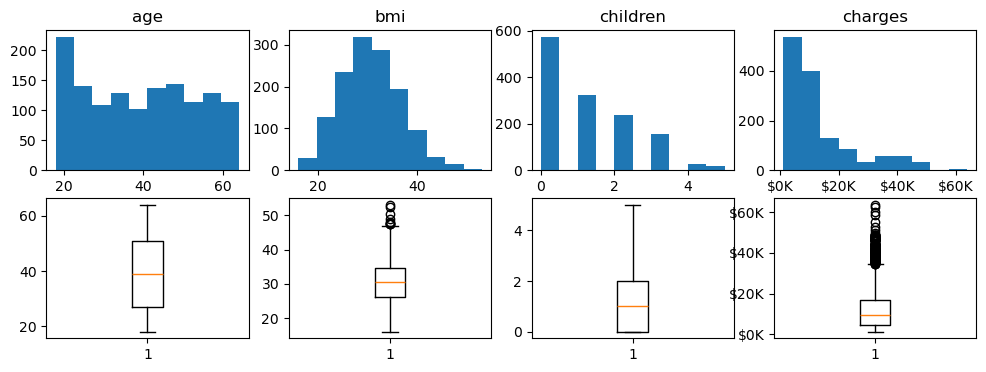

In [8]:
columns_to_plot = ['age','bmi','children','charges']

# plt.style.use('ggplot') # set pyplot style

# Create 2 x 4 subplots
figure, axes = plt.subplots(nrows=2,
                            ncols=len(columns_to_plot),
                            sharey=False,
                            figsize=(12,4))

# Plot of histograms and boxplots to observe distribution of numeric data
for col in columns_to_plot:
    axes[0][columns_to_plot.index(col)].set(title=col) # set title
    axes[0][columns_to_plot.index(col)].hist(df[col]) # histograms in top row
    axes[1][columns_to_plot.index(col)].boxplot(df[col]) # boxplots in bottom row

# Create function to format currency values
def currency(x, pos):
    'The two args are the value and tick position'
    if x >= 1000000:
        return '${:1.1f}M'.format(x*1e-6)
    return '${:1.0f}K'.format(x*1e-3)

# Format labels using currency formatter
formatter = FuncFormatter(currency)
axes[0][3].xaxis.set_major_formatter(formatter)
axes[1][3].yaxis.set_major_formatter(formatter)

1) Age: There seems to be an oversampling of younger participants in the dataset
2) BMI: Tends towards normal distribution
3) Number of Children: Right-skewed distribution
4) Charges: Right-skewed distribution

### 5) Data Analysis using Class methods

Using simple lists and loops in functions, a class `PatientsInfo` is constructed to perform simple analysis of the data.

While DataFrame methods can be used to perform the same analysis quicker, I am using this to familiarise myself with class method construction.

To store this information, seven empty lists will be created hold each individual column of data from **insurance.csv**.

In [9]:
#Create empty lists for the various attributes in insurance.csv
ages = list(df['age'])
sexes = list(df['sex'])
bmis = list(df['bmi'])
num_children = list(df['children'])
smoker_statuses = list(df['smoker'])
regions = list(df['region'])
insurance_charges = list(df['charges'])

Now that all the data from **insurance.csv** neatly organized into labeled lists, the analysis can be started. There are many aspects of the data that could be looked into. The following operations will be implemented:
* find average age of the patients
* return the number of males vs. females counted in the dataset
* find geographical location of the patients
* return the average yearly medical charges of the patients
* creating a dictionary that contains all patient information

To perform these inspections, a class called `PatientsInfo` has been built out which contains fives methods:
* `average_ages()`
* `count_sexes()`
* `unique_regions()`
* `average_charges()`
* `create_dictionary()`

The class has been built out below. 

In [10]:
class PatientsInfo:
    # init method that takes in each list parameter
    def __init__(self, patients_ages, patients_sexes, patients_bmis, patients_num_children, 
                 patients_smoker_statuses, patients_regions, patients_charges):
        self.patients_ages = patients_ages
        self.patients_sexes = patients_sexes
        self.patients_bmis = patients_bmis
        self.patients_num_children = patients_num_children
        self.patients_smoker_statuses = patients_smoker_statuses
        self.patients_regions = patients_regions
        self.patients_charges = patients_charges

    # method that calculates the average ages of the patients in insurance.csv
    def average_ages(self):
        # initialize total age at zero
        total_age = 0
        # iterate through all ages in the ages list
        for age in self.patients_ages:
            # sum of the total age
            total_age += int(age)
        # return total age divided by the length of the patient list
        return ("Average Patient Age: " + str(round(total_age/len(self.patients_ages), 2)) + " years")

    # method that calculates the number of males and females in insurance.csv
    def count_sexes(self):
        # initialize number of males and females to zero
        females = 0
        males = 0
        # iterate through each sex in the sexes list
        for sex in self.patients_sexes:
            # if female add to female variable
            if sex == 'female':
                females += 1
            # if male add to male variable
            elif sex == 'male':
                males += 1
        # print out the number of each
        print("Count for female: ", females)
        print("Count for male: ", males)

    # method to find each unique region patients are from
    def unique_regions(self):
        # initialize empty list
        unique_regions = []
        # iterate through each region in regions list
        for region in self.patients_regions:
            # if the region is not already in the unique regions list
            # then add it to the unique regions list
            if region not in unique_regions: 
                unique_regions.append(region)
        # return unique regions list
        return unique_regions

    # method to find average yearly medical charges for patients in insurance.csv
    def average_charges(self):
        # initialize total_charges variable
        total_charges = 0
        # iterate through charges in patients charges list
        # add each charge to total_charge
        for charge in self.patients_charges:
            total_charges += float(charge)
        # return the average charges rounded to the hundredths place
        return ("Average Yearly Medical Insurance Charges: " +  
                str(round(total_charges/len(self.patients_charges), 2)) + " dollars.")
    
    # method to create dictionary with all patients information
    def create_dictionary(self):
        self.patients_dictionary = {}
        self.patients_dictionary["age"] = [int(age) for age in self.patients_ages]
        self.patients_dictionary["sex"] = self.patients_sexes
        self.patients_dictionary["bmi"] = self.patients_bmis
        self.patients_dictionary["children"] = self.patients_num_children
        self.patients_dictionary["smoker"] = self.patients_smoker_statuses
        self.patients_dictionary["regions"] = self.patients_regions
        self.patients_dictionary["charges"] = self.patients_charges
        return self.patients_dictionary

The next step is to create an instance of the class called `patient_info`. With this instance, each method can be used to see the results of the analysis.

In [11]:
patient_info = PatientsInfo(ages, sexes, bmis, num_children, smoker_statuses, regions, insurance_charges)

In [12]:
patient_info.average_ages()

'Average Patient Age: 39.21 years'

The average age of the patients in **insurance.csv** is about 39 years old. This is important to check in order to ensure the data in **insurance.csv** is representative for a broader population. If it is decided to use the dataset to make inferences about other populations, the data must abundant and broad enough for such use cases.

A further analysis would have to be done to make sure the [range](https://www.mathsisfun.com/data/range.html#:~:text=The%20Range%20is%20the%20difference,is%209%20%E2%88%92%203%20%3D%206.) and [standard deviation](https://www.mathsisfun.com/data/standard-deviation.html) of the patient age group in **insurance.csv** is indicative of a random sampling of individuals. 

In [13]:
patient_info.count_sexes()

Count for female:  662
Count for male:  676


The next step of the analysis is to check the balance of males vs. females in **insurance.csv**. Similar to above, it is important to check that this dataset is representative of a broader population of individuals. If a person were to use this dataset to create a classification model, it would be imperitive to make sure that the attributes are balanced, otherwise it can cause statistical problems.



In [14]:
patient_info.unique_regions()

['southwest', 'southeast', 'northwest', 'northeast']

There are four unique geographical regions from the United States in this dataset.

In [15]:
patient_info.average_charges()

'Average Yearly Medical Insurance Charges: 13270.42 dollars.'

The average yearly medical insurance charge per individual is 13270 US dollars. Some further analysis could be done to see what patient attributes contribute most strongly to low and/or high medical insurance charges. For example, one could check if patient age correlates with the amount of money they spend yearly.

All patient data can be organized in a dictionary below. This is convenient for further analysis if a decision is made to continue making investigations for the attributes in **insurance.csv**.

In [17]:
# Uncomment line below to create dictionary. Commented here to reduce file size based on previewed output.
# patient_info.create_dictionary()